# Neural Network

In [1]:
import pandas as pd #for manipulating the data set
import tensorflow
from tensorflow import keras #first had to install the keras package used for image neural network processing on anaconda
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split #for splitting the data into train and test
import keras.backend as K
K.clear_session()
from keras import optimizers
from sklearn.preprocessing import StandardScaler #for zero-mean and unit variance
sc = StandardScaler()

Using TensorFlow backend.


Next we import the data from http://archive.ics.uci.edu/ml/datasets/Forest+type+mapping and note that it was already separated into training and testing in .csv format. 

The data info: "This data set contains training and testing data from a remote sensing study which mapped different forest types based on their spectral characteristics at visible-to-near infrared wavelengths, using ASTER satellite imagery. The output (forest type map) can be used to identify and/or quantify the ecosystem services (e.g. carbon storage, erosion protection) provided by the forest."

The classes are: "'s' ('Sugi' forest), 'h' ('Hinoki' forest), 'd' ('Mixed deciduous' forest), 'o' ('Other' non-forest land)"

The features represent spectral data consisting of 9 spectral bands and 18 "similarity measures calculated from the IDW interpolated values".

The paper http://www.cr.chiba-u.jp/~tateishi-lab/pdf/2011/Using%20geographically%202011.pdf utilized an SVM algorithm and we hope to improve on its accuracy by using a simple neural network below.



In [2]:
#the data as provided by the UCI database already split
df_train = pd.read_csv('training.csv',delim_whitespace=False)
df_test = pd.read_csv('testing.csv',delim_whitespace=False)
df_test.shape #325 examples of 27 features each
df_train.shape #198 examples of 27 features each - 62:38 ratio of test v. train

(198, 28)

In [3]:
class_mapping={label:idx for idx,label in enumerate(np.unique(df_train['class']))} # change the class names which are strings to integers
df_train['class']=df_train['class'].map(class_mapping)
class_mapping={label:idx for idx,label in enumerate(np.unique(df_test['class']))}
df_test['class']=df_test['class'].map(class_mapping)
X_train, y_train = df_train.iloc[:, 1:].values, df_train.iloc[:, 0].values # the first column is class header
X_test, y_test = df_test.iloc[:, 1:].values, df_test.iloc[:, 0].values # the first column is class header
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Now we create a very simple network.  The features are:
*  We have one hidden layer with `nh=100` units.  
*  One output layer with `nout=4` units, one for each of the 4 possible classes
*  The output activation is `softmax`, which is used for multi-class targets

In [4]:
nin = X_train.shape[1]  # dimension of input data
nh = 100     # number of hidden units
nout = 4   # number of outputs = 4 since there are 4 classes
model = Sequential()
model.add(Dense(nh, input_shape=(nin,), activation='sigmoid', name='hidden')) # we keep the activation function as a sigmoid
model.add(Dense(nout, activation='softmax', name='output'))

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.summary() #we will be training all of the parameters in the neural network

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               2800      
_________________________________________________________________
output (Dense)               (None, 4)                 404       
Total params: 3,204
Trainable params: 3,204
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer=tensorflow.train.GradientDescentOptimizer(0.001), # doing gradient descent to update te parameters with learning rate of 0.001
             loss='sparse_categorical_crossentropy', #loss function instead of squared difference sparse categorical crossentropy due to multi-class system
             metrics=['accuracy'])

In [7]:
model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 198 samples, validate on 325 samples
Epoch 1/2000
198/198 [==============================] - 1s 3ms/step - loss: 1.6636 - acc: 0.2980 - val_loss: 1.5690 - val_acc: 0.4185
Epoch 2/2000
198/198 [==============================] - 0s 205us/step - loss: 1.6440 - acc: 0.2980 - val_loss: 1.5531 - val_acc: 0.4185
Epoch 3/2000
198/198 [==============================] - 0s 121us/step - loss: 1.6248 - acc: 0.2980 - val_loss: 1.5367 - val_acc: 0.4185
Epoch 4/2000
198/198 [==============================] - 0s 101us/step - loss: 1.6050 - acc: 0.2980 - val_loss: 1.5223 - val_acc: 0.4185
Epoch 5/2000
198/198 [==============================] - 0s 120us/step - loss: 1.5870 - acc: 0.2980 - val_loss: 1.5091 - val_acc: 0.4185
Epoch 6/2000
198/198 [==============================] - 0s 98us/step - loss: 1.5713 - acc: 0.2980 - val_loss: 1.4974 - val_acc: 0.4185
Epoch 7/2000
198/198 [==============================] - 0s 205us/step - loss: 1.5559 - acc: 0

* The batch size is a hyperparameter of gradient descent that controls the number of training samples to work through before the model’s internal parameters are updated. We touched briefly upon batch gradient descent in neural lecture.
* The number of epochs is a hyperparameter of gradient descent that controls the number of complete passes through the training dataset. What we call num_iter in the gradient descent algorithm - update number

In [8]:
sigmoid1 = model.evaluate(X_test,y_test, batch_size=32) #let us see how well our model did, around 78% accuracy
print(sigmoid1[1])

325/325 [==============================] - 0s 36us/step
0.766153846337245


In [9]:
opt = optimizers.Adam(lr=0.001) # our optimizer for this model is Adam instead of the stochastic gradient because the learning rate will be flexible as well which comes in hand when we plateau and it also finds individual parameter learning rates. The starting learning rate is 0.001
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy', #we picked the sparse_categorical_crossentropy loss function because our classes are mutually exclusive (e.g. when each sample belongs exactly to one class)
              metrics=['accuracy'])

* The batch size is a hyperparameter of gradient descent that controls the number of training samples to work through before the model’s internal parameters are updated. We touched briefly upon batch gradient descent in neural lecture.
* The number of epochs is a hyperparameter of gradient descent that controls the number of complete passes through the training dataset. What we call num_iter in the gradient descent algorithm - update number

In [10]:
model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test,y_test))

Train on 198 samples, validate on 325 samples
Epoch 1/2000
198/198 [==============================] - 1s 4ms/step - loss: 0.2301 - acc: 0.9596 - val_loss: 0.6369 - val_acc: 0.7631
Epoch 2/2000
198/198 [==============================] - 0s 99us/step - loss: 0.2136 - acc: 0.9596 - val_loss: 0.6221 - val_acc: 0.7631
Epoch 3/2000
198/198 [==============================] - 0s 97us/step - loss: 0.2014 - acc: 0.9596 - val_loss: 0.6313 - val_acc: 0.7631
Epoch 4/2000
198/198 [==============================] - 0s 109us/step - loss: 0.1885 - acc: 0.9646 - val_loss: 0.6357 - val_acc: 0.7631
Epoch 5/2000
198/198 [==============================] - 0s 98us/step - loss: 0.1783 - acc: 0.9646 - val_loss: 0.6399 - val_acc: 0.7631
Epoch 6/2000
198/198 [==============================] - 0s 118us/step - loss: 0.1703 - acc: 0.9697 - val_loss: 0.6403 - val_acc: 0.7662
Epoch 7/2000
198/198 [==============================] - 0s 89us/step - loss: 0.1626 - acc: 0.9596 - val_loss: 0.6329 - val_acc: 0.7662
Epoch 8/

In [11]:
adam1 = model.evaluate(X_test,y_test, batch_size=32) #let us see how well our model did, should be around 74% accuracy which is slightly lower than for using the gradient descent algorithm above which is a problem sometimes identified with Adam
print(adam1[1])

325/325 [==============================] - 0s 43us/step
0.7446153847987835


Now we will tinker a bit with the model to see if we can get better accuracy:

* We will decrease the batch size to 16 to try to decrease possible generalization error and see hopefully an increase in accuracy

* We have seen that the relu activation function gives lower error so we will use it instead of the sigmoid


In [12]:
model.compile(optimizer=tensorflow.train.GradientDescentOptimizer(0.001), # let us stick to our good old gradient descent, now halving our batch size
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2000, batch_size=16, validation_data=(X_test,y_test))

Train on 198 samples, validate on 325 samples
Epoch 1/2000
198/198 [==============================] - 1s 3ms/step - loss: 2.4727e-06 - acc: 1.0000 - val_loss: 2.4051 - val_acc: 0.7446
Epoch 2/2000
198/198 [==============================] - 0s 166us/step - loss: 2.4727e-06 - acc: 1.0000 - val_loss: 2.4051 - val_acc: 0.7446
Epoch 3/2000
198/198 [==============================] - 0s 170us/step - loss: 2.4727e-06 - acc: 1.0000 - val_loss: 2.4051 - val_acc: 0.7446
Epoch 4/2000
198/198 [==============================] - 0s 169us/step - loss: 2.4727e-06 - acc: 1.0000 - val_loss: 2.4051 - val_acc: 0.7446
Epoch 5/2000
198/198 [==============================] - 0s 152us/step - loss: 2.4727e-06 - acc: 1.0000 - val_loss: 2.4051 - val_acc: 0.7446
Epoch 6/2000
198/198 [==============================] - 0s 138us/step - loss: 2.4727e-06 - acc: 1.0000 - val_loss: 2.4051 - val_acc: 0.7446
Epoch 7/2000
198/198 [==============================] - 0s 194us/step - loss: 2.4727e-06 - acc: 1.0000 - val_loss: 2

In [13]:
batch1 = model.evaluate(X_test,y_test, batch_size=16) # the accuracy is approximately the same as for the 32 batch size
print(batch1[1])

325/325 [==============================] - 0s 109us/step
0.7446153847987835


In [14]:
K.clear_session()
model = Sequential()
model.add(Dense(nout, activation='softmax', name='output'))
model.add(Dense(nh, input_shape=(nin,), activation='relu')) #let us try out the relu activation function
model.compile(optimizer=tensorflow.train.GradientDescentOptimizer(0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test,y_test))

Train on 198 samples, validate on 325 samples
Epoch 1/2000
198/198 [==============================] - 1s 3ms/step - loss: 11.4421 - acc: 0.0000e+00 - val_loss: 12.2372 - val_acc: 0.0000e+00
Epoch 2/2000
198/198 [==============================] - 0s 140us/step - loss: 10.2709 - acc: 0.0000e+00 - val_loss: 11.1896 - val_acc: 0.0062
Epoch 3/2000
198/198 [==============================] - 0s 112us/step - loss: 10.0239 - acc: 0.0000e+00 - val_loss: 10.8880 - val_acc: 0.0431
Epoch 4/2000
198/198 [==============================] - 0s 131us/step - loss: 9.5891 - acc: 0.0960 - val_loss: 10.3924 - val_acc: 0.0954
Epoch 5/2000
198/198 [==============================] - 0s 119us/step - loss: 9.3004 - acc: 0.1364 - val_loss: 10.1114 - val_acc: 0.1231
Epoch 6/2000
198/198 [==============================] - 0s 138us/step - loss: 9.1018 - acc: 0.1566 - val_loss: 9.7673 - val_acc: 0.1323
Epoch 7/2000
198/198 [==============================] - 0s 193us/step - loss: 7.8770 - acc: 0.1667 - val_loss: 9.009

In [15]:
relu1 = model.evaluate(X_test,y_test, batch_size=32) # while relu is great in preventing saturation, it does not help us here and accuracy dropped drastically probably due to dying neurons
# we tried smaller learning rates which should prevent it but to no avail
print(relu1[1])

325/325 [==============================] - 0s 56us/step
0.3230769231227728


In [16]:
from keras.layers import LeakyReLU # perhaps neuros are dying and not being updated due to negative values making gradient 0 so try LEaky-relu

# instead of model.add(Activation('relu'))
# use
K.clear_session()
model = Sequential()
model.add(Dense(nout, activation='softmax', name='output'))
model.add(LeakyReLU(alpha=0.1))
model.compile(optimizer=tensorflow.train.GradientDescentOptimizer(0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test,y_test))

Train on 198 samples, validate on 325 samples
Epoch 1/2000
198/198 [==============================] - 0s 2ms/step - loss: 1.9311 - acc: 0.2172 - val_loss: 2.0377 - val_acc: 0.1908
Epoch 2/2000
198/198 [==============================] - 0s 117us/step - loss: 1.9085 - acc: 0.2172 - val_loss: 2.0165 - val_acc: 0.1938
Epoch 3/2000
198/198 [==============================] - 0s 95us/step - loss: 1.8859 - acc: 0.2273 - val_loss: 1.9952 - val_acc: 0.1938
Epoch 4/2000
198/198 [==============================] - 0s 106us/step - loss: 1.8631 - acc: 0.2374 - val_loss: 1.9764 - val_acc: 0.1938
Epoch 5/2000
198/198 [==============================] - 0s 94us/step - loss: 1.8430 - acc: 0.2374 - val_loss: 1.9568 - val_acc: 0.1969
Epoch 6/2000
198/198 [==============================] - 0s 92us/step - loss: 1.8219 - acc: 0.2424 - val_loss: 1.9382 - val_acc: 0.2062
Epoch 7/2000
198/198 [==============================] - 0s 115us/step - loss: 1.8021 - acc: 0.2525 - val_loss: 1.9199 - val_acc: 0.2123
Epoch 8

In [17]:
leaky1 = model.evaluate(X_test,y_test, batch_size=32) #accuracy is now much better than for relu and similar to the original sigmoid activation
print(leaky1[1])

325/325 [==============================] - 0s 46us/step
0.7692307694141681


# Now we will repeat the above but with our own custom fit

As the split above is suspicious due to it having a much larger testing than training data set, we fear that it might be causing underfitting due to lack of training data and also going against the data-hungry nature of a neural network.

In [18]:
#the data as manually concatenated in excel of training and test as provided by the database
df= pd.read_csv('data.csv',delim_whitespace=False)
class_mapping={label:idx for idx,label in enumerate(np.unique(df['class']))}
df['class']=df['class'].map(class_mapping)
X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values # the first column is class header
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # we will be using 70:30 for train vs. test as we want to maximize the training data size and the ratio has also shown better performance in nerual algorithm processing
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [19]:
# SIGMOID GRADIENT DESCENT
K.clear_session()
nin = X_train.shape[1]  # dimension of input data
nh = 100     # number of hidden units
nout = 4   # number of outputs = 4 since there are 4 classes
model = Sequential()
model.add(Dense(nh, input_shape=(nin,), activation='sigmoid', name='hidden')) # we keep the activation function as a sigmoid
model.add(Dense(nout, activation='softmax', name='output'))
model.compile(optimizer=tensorflow.train.GradientDescentOptimizer(0.001), # doing gradient descent to update te parameters with learning rate of 0.001
             loss='sparse_categorical_crossentropy', #loss function instead of squared difference sparse categorical crossentropy due to multi-class system
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test,y_test))

Train on 227 samples, validate on 98 samples
Epoch 1/2000
227/227 [==============================] - 0s 2ms/step - loss: 1.4664 - acc: 0.1762 - val_loss: 1.4348 - val_acc: 0.2551
Epoch 2/2000
227/227 [==============================] - 0s 62us/step - loss: 1.4589 - acc: 0.1762 - val_loss: 1.4290 - val_acc: 0.2755
Epoch 3/2000
227/227 [==============================] - 0s 88us/step - loss: 1.4532 - acc: 0.1762 - val_loss: 1.4220 - val_acc: 0.2755
Epoch 4/2000
227/227 [==============================] - 0s 155us/step - loss: 1.4472 - acc: 0.1894 - val_loss: 1.4151 - val_acc: 0.2959
Epoch 5/2000
227/227 [==============================] - 0s 105us/step - loss: 1.4413 - acc: 0.1850 - val_loss: 1.4107 - val_acc: 0.3061
Epoch 6/2000
227/227 [==============================] - 0s 77us/step - loss: 1.4371 - acc: 0.1982 - val_loss: 1.4052 - val_acc: 0.3061
Epoch 7/2000
227/227 [==============================] - 0s 69us/step - loss: 1.4323 - acc: 0.1938 - val_loss: 1.3990 - val_acc: 0.3163
Epoch 8/2

In [20]:
sigmoid2 = model.evaluate(X_test,y_test, batch_size=32) #let us see how well our model did, above 90% accuracy, clearly indicating that their original split had to little training data and therefore was giving lower accuracy
print(sigmoid2[1])

98/98 [==============================] - 0s 70us/step
0.9795918367346939


In [21]:
model.compile(optimizer=tensorflow.train.GradientDescentOptimizer(0.001), # let us stick to our good old gradient descent, now halving our batch size
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2000, batch_size=16, validation_data=(X_test,y_test))

Train on 227 samples, validate on 98 samples
Epoch 1/2000
227/227 [==============================] - 1s 3ms/step - loss: 0.3536 - acc: 0.8899 - val_loss: 0.2992 - val_acc: 0.9796
Epoch 2/2000
227/227 [==============================] - 0s 135us/step - loss: 0.3535 - acc: 0.8899 - val_loss: 0.2991 - val_acc: 0.9796
Epoch 3/2000
227/227 [==============================] - 0s 202us/step - loss: 0.3533 - acc: 0.8899 - val_loss: 0.2990 - val_acc: 0.9796
Epoch 4/2000
227/227 [==============================] - 0s 188us/step - loss: 0.3531 - acc: 0.8899 - val_loss: 0.2989 - val_acc: 0.9796
Epoch 5/2000
227/227 [==============================] - 0s 149us/step - loss: 0.3530 - acc: 0.8899 - val_loss: 0.2987 - val_acc: 0.9796
Epoch 6/2000
227/227 [==============================] - 0s 154us/step - loss: 0.3529 - acc: 0.8899 - val_loss: 0.2986 - val_acc: 0.9796
Epoch 7/2000
227/227 [==============================] - 0s 145us/step - loss: 0.3528 - acc: 0.8899 - val_loss: 0.2985 - val_acc: 0.9796
Epoch

In [22]:
batch2 = model.evaluate(X_test,y_test, batch_size=16) #we get approximately the same accuracy for the batch size change
print(batch2[1])

98/98 [==============================] - 0s 160us/step
0.9693877551020408


In [23]:
# RELU GRADIENT DESCENT
K.clear_session()
model = Sequential()
model.add(Dense(nout, activation='softmax', name='output'))
model.add(Dense(nh, input_shape=(nin,), activation='relu')) #let us try out the relu activation function
model.compile(optimizer=tensorflow.train.GradientDescentOptimizer(0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test,y_test))

Train on 227 samples, validate on 98 samples
Epoch 1/2000
227/227 [==============================] - 1s 4ms/step - loss: 6.8044 - acc: 0.0881 - val_loss: 5.3373 - val_acc: 0.1837
Epoch 2/2000
227/227 [==============================] - 0s 141us/step - loss: 6.2048 - acc: 0.1322 - val_loss: 5.1811 - val_acc: 0.2551
Epoch 3/2000
227/227 [==============================] - 0s 126us/step - loss: 5.5705 - acc: 0.1718 - val_loss: 4.7660 - val_acc: 0.2959
Epoch 4/2000
227/227 [==============================] - 0s 137us/step - loss: 5.2370 - acc: 0.1454 - val_loss: 4.6721 - val_acc: 0.3061
Epoch 5/2000
227/227 [==============================] - 0s 169us/step - loss: 5.1434 - acc: 0.1586 - val_loss: 4.5979 - val_acc: 0.3061
Epoch 6/2000
227/227 [==============================] - 0s 96us/step - loss: 5.0686 - acc: 0.1542 - val_loss: 4.5326 - val_acc: 0.3265
Epoch 7/2000
227/227 [==============================] - 0s 96us/step - loss: 5.0029 - acc: 0.1938 - val_loss: 4.4707 - val_acc: 0.3367
Epoch 8

In [24]:
relu2 = model.evaluate(X_test,y_test, batch_size=32) # still significant drop of accuracy indicating that the neurons are dying probably due to a large learning rate but we find the same even with decreasing learning rate
print(relu2[1])

98/98 [==============================] - 0s 63us/step
0.22448979591836735


In [25]:
# LEAKY RELU GRADIENT DESCENT
from keras.layers import LeakyReLU # perhaps neuros are dying and not being updated due to negative values making gradient 0 so try LEaky-relu

# instead of model.add(Activation('relu'))
# use
K.clear_session()
model = Sequential()
model.add(Dense(nout, activation='softmax', name='output'))
model.add(LeakyReLU(alpha=0.1))
model.compile(optimizer=tensorflow.train.GradientDescentOptimizer(0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test,y_test))

Train on 227 samples, validate on 98 samples
Epoch 1/2000
227/227 [==============================] - 0s 2ms/step - loss: 2.0156 - acc: 0.2115 - val_loss: 1.9404 - val_acc: 0.2755
Epoch 2/2000
227/227 [==============================] - 0s 58us/step - loss: 1.9925 - acc: 0.2159 - val_loss: 1.9203 - val_acc: 0.2755
Epoch 3/2000
227/227 [==============================] - 0s 74us/step - loss: 1.9716 - acc: 0.2203 - val_loss: 1.8994 - val_acc: 0.2959
Epoch 4/2000
227/227 [==============================] - 0s 74us/step - loss: 1.9494 - acc: 0.2247 - val_loss: 1.8794 - val_acc: 0.3061
Epoch 5/2000
227/227 [==============================] - 0s 124us/step - loss: 1.9283 - acc: 0.2247 - val_loss: 1.8579 - val_acc: 0.3061
Epoch 6/2000
227/227 [==============================] - 0s 93us/step - loss: 1.9061 - acc: 0.2291 - val_loss: 1.8388 - val_acc: 0.3061
Epoch 7/2000
227/227 [==============================] - 0s 91us/step - loss: 1.8859 - acc: 0.2379 - val_loss: 1.8205 - val_acc: 0.3265
Epoch 8/20

In [26]:
leaky2 = model.evaluate(X_test,y_test, batch_size=32) # with leaky relu we get the highest accuracy which strongly indicates that the neurons were dying with the relu activation function
print(leaky2[1])

98/98 [==============================] - 0s 106us/step
0.9693877551020408


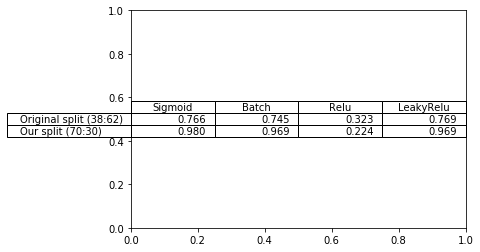

In [28]:
# Accuracy plot
data = [[ sigmoid1[1], batch1[1],  relu1[1], leaky1[1]],
        [sigmoid2[1], batch2[1], relu2[1], leaky2[1]]]

columns = ('Sigmoid', 'Batch', 'Relu', 'LeakyRelu')
rows = ('Original split (38:62)', 'Our split (70:30)')
y_offset = np.zeros(len(columns))
index = np.arange(len(columns)) + 0.3
n_rows = len(rows)
cell_text = []
for row in range(n_rows):
    y_offset = data[row]
    cell_text.append(['%0.3f' % (x) for x in y_offset])

# Add a table
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      colLabels=columns,
                      loc='center')

In [29]:
df2 = pd.DataFrame(np.array([['Original split(38:62)',sigmoid1[1], batch1[1],  relu1[1], leaky1[1]], ['Our split(70:30)',sigmoid2[1], batch2[1], relu2[1], leaky2[1]]]), columns=['Split','Sigmoid', 'Batch', 'Relu','LeakyRelu'])
df2

,Split,Sigmoid,Batch,Relu,LeakyRelu
0,Original split(38:62),0.766153846337245,0.7446153847987835,0.3230769231227728,0.7692307694141681
1,Our split(70:30),0.9795918367346939,0.9693877551020408,0.22448979591836735,0.9693877551020408
